# Assignment 9
Linda Koine, Jens Weimann, Markus Wiktorin

## 1

In [1]:
from IPython.display import Image
#Image("")

## 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
class SOM:
    def __init__(self, input_dimension, map_size, distance_function, learning_rate, weights=None):
        self.input_dimension = input_dimension
        self.map_size = map_size
        self.distance_function = distance_function
        self.learning_rate = learning_rate
        
        if weights is None:
            self.weights = np.random.rand(map_size, input_dimension)
        else:
            self.weights = weights
            
    def plot_weights(self):
        plt.figure()
        plt.axis("equal")
        plt.plot(self.weights[:,0], self.weights[:,1], c="r")
        plt.scatter(self.weights[:,0], self.weights[:,1], c="r")
        
    def get_closest_weight_index(self, sample, exclude_indices=None):
        min_idx = 0
        while (exclude_indices != None) and (min_idx in exclude_indices):
            min_idx = min_idx + 1
            
        min_distance = self.distance_function(self.weights[min_idx], sample)
        idx = 0
        for weight in self.weights:
            distance = self.distance_function(weight, sample)
            if distance < min_distance:
                if exclude_indices == None or idx not in exclude_indices:                    
                    min_distance = distance
                    min_idx = idx
            idx = idx + 1
        return min_idx
        
    def train(self, sample_set, distance_treshold, epsilon):
        changed = 100
        while changed > epsilon:
            changed = 0
            for sample in sample_set:
                min_idx = self.get_closest_weight_index(sample)
                for i in range(len(self.weights)):
                    distance = self.distance_function(self.weights[min_idx], self.weights[i])
                    if i == min_idx or distance < distance_treshold:
                        direction = sample - self.weights[i]
                        delta = self.learning_rate * (1 / (distance * 2 + 1)) * direction
                        self.weights[i] = self.weights[i] + delta
                        changed = changed + np.sum(delta)
                        
    def fit_to_points(self, sample_set):
        altered_weights = []
        for sample in sample_set:
            min_idx = self.get_closest_weight_index(sample, altered_weights)
            self.weights[min_idx] = sample
            altered_weights.append(min_idx)

In [13]:
def simple_distance_function(x, y):
    return abs(x - y)

In [27]:
input = [0.1, 0.2, 0.4, 0.5]
learning_rate = 0.1
input_dimension = 1
nodes = 2
epsilon = 0.01
distance_treshold = 0

weights1 = np.array([0.15, 0.45])
weights2 = np.array([0.3, 0.9])

som = SOM(input_dimension, nodes, simple_distance_function, learning_rate, weights1)
som.train(input, distance_treshold, epsilon)
print(som.weights)

som = SOM(input_dimension, nodes, simple_distance_function, learning_rate, weights2)
som.train(input, distance_treshold, epsilon)
print(som.weights)

[ 0.1505  0.4505]
[ 0.30632  0.9    ]


## 3

In [29]:
def one_dim_circle_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

In [30]:
def plot_problem(samples, weights):
    plt.figure()
    plt.axis("equal")
    plt.plot(weights[:,0], weights[:,1], c="r")
    plt.scatter(weights[:,0], weights[:,1], c="orange")
    plt.scatter(samples[:,0], samples[:,1], c="g")
    plt.legend(["solution", "weights", "cities"])

In [31]:
def tsp_distance_som(weights):
    distance = 0
    start = weights[0]
    last = start
    for weight in weights[1:]:
        distance = distance + np.linalg.norm(last - weight)
        last = weight
    distance = distance + np.linalg.norm(last - start)
    return distance

def tsp_distance(coords, order):
    distance = 0
    start = order[0]
    last = start
    for i in range(1, len(order)):
        distance = distance + np.linalg.norm(coords[last] - coords[i])
        last = i
    distance = distance + np.linalg.norm(coords[last] - coords[start])
    return distance

In [50]:
import itertools
def tsp_brut_force(cities):
    permutations = itertools.permutations(range(len(cities)))
    min_dist = 9999999999999999
    min_order = 0
    for order in permutations:
        dist = tsp_distance(cities, order)
        if dist < min_dist:
            min_dist = dist
            min_order = order
    plt.figure()
    plt.axis("equal")
    x = [cities[i][0] for i in order]
    y = [cities[i][1] for i in order]
    plt.title("Best solution with brut force")
    plt.plot(x, y, c="r")
    plt.scatter(x, y, c="g")
    plt.legend(["solution", "cities"])
    plt.show()
    return order

In [41]:
import random, numpy, math, copy, matplotlib.pyplot as plt
def tsp_solver(cities):
    '''
    Taken from https://ericphanson.com/posts/2016/the-traveling-salesman-and-10-lines-of-python/
    '''
    tour = random.sample(range(len(cities)),len(cities));
    for temperature in numpy.logspace(0,5,num=100000)[::-1]:
        [i,j] = sorted(random.sample(range(len(cities)),2));
        newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:];
        if math.exp( ( sum([ math.sqrt(sum([(cities[tour[(k+1) % len(cities)]][d] - cities[tour[k % len(cities)]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]]) - sum([math.sqrt(sum([(cities[newTour[(k+1) % len(cities)]][d] - cities[newTour[k % len(cities)]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])) / temperature) > random.random():
            tour = copy.copy(newTour);
    plt.figure()
    plt.axis("equal")
    x = [cities[i][0] for i in tour]
    y = [cities[i][1] for i in tour]
    plt.plot(x, y, c="r")
    plt.scatter(x, y, c="g")
    plt.legend(["solution", "cities"])
    plt.show()
    print("Optimal distance:", tsp_distance(np.array(cities), np.array(tour)))

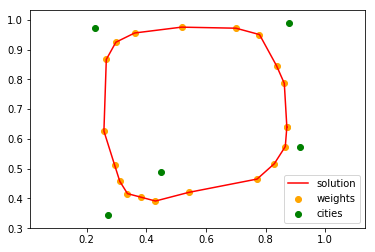

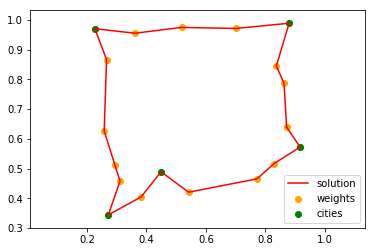

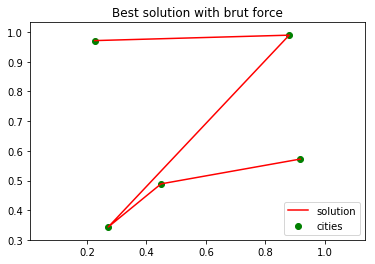

Our Distance:  2.51384258106
Best distance:  2.3014823951
How close to optimum:  0.915523673774


In [51]:
num_cities = 5
circle_points = 20
learning_rate = 0.4
input_dimension = 2
distance_treshold = 0.3
training_epsilon = 0.05

cities = np.random.rand(num_cities, input_dimension)
mean_x = np.mean(cities, 0)[0]
mean_y = np.mean(cities, 0)[1]

angles = np.linspace(0, 2 * np.pi, circle_points)
x = 0.3 * np.cos(angles) + mean_x
y = 0.3 * np.sin(angles) + mean_y
weights = np.column_stack((x, y))

som = SOM(input_dimension, circle_points, one_dim_circle_distance, learning_rate, weights)

som.train(cities, distance_treshold, training_epsilon)

plot_problem(cities, som.weights)

som.fit_to_points(cities)

plot_problem(cities, som.weights)

plt.show()
our_distance = tsp_distance_som(som.weights)

best_order = tsp_brut_force(cities)
best_distance = tsp_distance(cities, best_order)

print("Our Distance: ", our_distance)
print("Best distance: ", best_distance)
print("How close to optimum: ", best_distance / our_distance)

## 4